In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [3]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


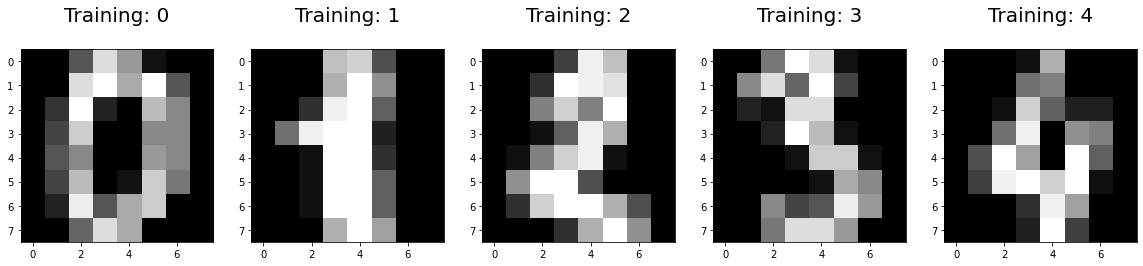

In [12]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [15]:
# Dividing the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1383, 64)
(1383,)
(414, 64)
(414,)


In [16]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# predicting the output of the first element of the test set
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [19]:
print(logisticRegr.predict(x_test[0:10]))

[4 0 9 1 8 7 1 5 1 6]


In [20]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9516908212560387


Text(0.5, 1.0, 'Accuracy score: [0]')

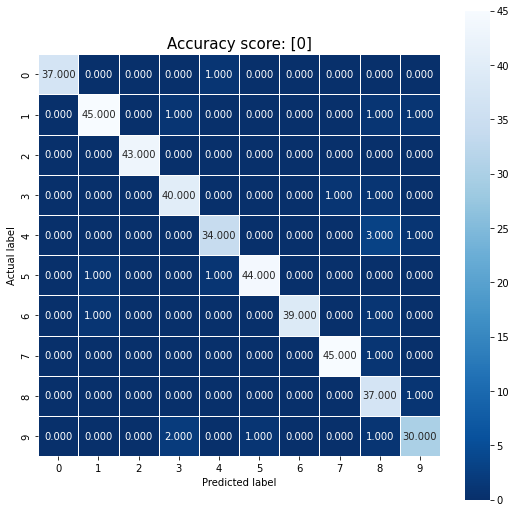

In [25]:
# representing the confusion matrix in a heat map
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score: [0]'.format(score)
plt.title(all_sample_title, size = 15)

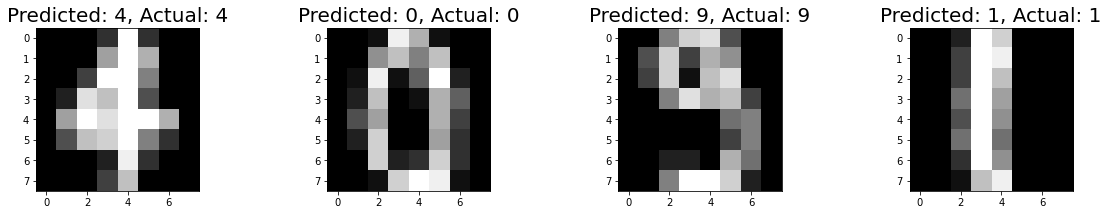

In [28]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        misclassifiedIndex.append(index)
    index += 1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize=20)